In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import mwparserfromhell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv('wiki-RFA.csv', index_col=0, parse_dates=['Date'])
df.Comment = df.Comment.astype(str)

In [7]:
df["Parsed_Comment"] = df.Comment.apply(lambda x: mwparserfromhell.parse(x).strip_code())
df

,Source,Target,Vote,Results,Year,Date,Comment,Parsed_Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,Support as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ..."
...,...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....


In [50]:
df.loc[51]

Source                        LlamaAl
Target                            BDD
Vote                                1
Results                             1
Year                             2013
Date              2013-04-22 04:12:00
Comment                           nan
Parsed_Comment                    nan
Name: 51, dtype: object

In [28]:
stat_df = pd.DataFrame(columns = ['Comment', 'Parsed_Comment'])
stat_df['Comment'] = df['Comment']
stat_df['Parsed_Comment']=df['Parsed_Comment']

In [29]:
vectorizer = CountVectorizer()
stat_df['Vectorized_Comment'] = stat_df['Parsed_Comment'].apply(lambda x: vectorizer.build_analyzer()(x))
stat_df['Vector_Size'] = stat_df['Vectorized_Comment'].apply(lambda x: len(x))
stat_df

,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
0,'''Support''' as co-nom.,Support as co-nom.,"[support, as, co, nom]",4
1,'''Support''' as nominator.--,Support as nominator.--,"[support, as, nominator]",3
2,'''Support''' per noms.,Support per noms.,"[support, per, noms]",3
3,'''Support''' per noms. BDD is a strong contri...,Support per noms. BDD is a strong contributor ...,"[support, per, noms, bdd, is, strong, contribu...",19
4,"'''Support''', with great pleasure. I work wit...","Support, with great pleasure. I work with BDD ...","[support, with, great, pleasure, work, with, b...",34
...,...,...,...,...
198270,Support,Support,[support],1
198271,Support.,Support.,[support],1
198272,Support. --,Support. --,[support],1
198273,Support. Age has nothing to do with maturity....,Support. Age has nothing to do with maturity....,"[support, age, has, nothing, to, do, with, mat...",8


### Comment analysis

In [41]:
print('The minimun length of the comment is: ', np.min(stat_df['Vector_Size']))
print('The maximum length of the comment is: ', np.max(stat_df['Vector_Size']))

proportion_no_comment=np.sum(stat_df['Vector_Size']==0)/len(stat_df['Vector_Size'])*100
print('The percentage of vote without comment is: ', proportion_no_comment)
proportion_one_word=np.sum(stat_df['Vector_Size']==1)/len(stat_df['Vector_Size'])*100
print('The percentage of comment with one word is: ', proportion_one_word)
proportion_two_word=np.sum(stat_df['Vector_Size']==2)/len(stat_df['Vector_Size'])*100
print('The percentage of comment with 2 words is: ', proportion_two_word)

The minimun length of the comment is:  0
The maximum length of the comment is:  891
The percentage of vote without comment is:  0.9143865842894968
The percentage of comment with one word is:  10.839490606480897
The percentage of comment with 2 words is:  2.409784390366915


No comment analysis

In [288]:
zero_word = stat_df[stat_df['Vector_Size']==0] #the vectorization removes almost all stop words/non significant words
zero_word

,Comment,Parsed_Comment,Vectorized_Comment,Vector_Size
156,{{pro}} --,--,[],0
373,← &mdash;&nbsp;''',← — ''',[],0
427,--,--,[],0
441,--,--,[],0
543,--,--,[],0
...,...,...,...,...
197653,--,--,[],0
197837,<!-- [[User:132.239.16.160|132.239.16.160]] -->,,[],0
197902,[[User talk:TPK|T.]],T.,[],0
197940,--,--,[],0


One word comment analysis

In [42]:
one_word = stat_df[stat_df['Vector_Size']==1]

print('Proportion of comment of one word', len(one_word['Vector_Size'])/np.sum(stat_df['Vector_Size'])*100)
print('The proportion of one word comment which is "nan" is: ', np.sum(np.concatenate(one_word['Vectorized_Comment'].values)=='nan')/len(one_word['Vector_Size'])*100)

one_word_support = one_word[(np.concatenate(one_word['Vectorized_Comment'].values)=='support')]
print('The proportion of one word comment which is "support" is: ', len(one_word_support)/len(one_word['Vector_Size'])*100)

one_word_other = one_word[(np.concatenate(one_word['Vectorized_Comment'].values)!='support') & (np.concatenate(one_word['Vectorized_Comment'].values)!='nan')]
print('The proportion of one word comment which is NOT "support" or "nan" is: ', len(one_word_other)/len(one_word['Vector_Size'])*100)

Proportion of comment of one word 0.436921092766244
The proportion of one word comment which is "nan" is:  33.45430857993672
The proportion of one word comment which is "support" is:  56.88628326819282
The proportion of one word comment which is NOT "support" or "nan" is:  9.659408151870464


In [267]:
df_one_word = pd.DataFrame(np.concatenate(one_word['Vectorized_Comment'].values), columns=['word']) #handle the list of string type for each row
percentage=df_one_word['word'].value_counts(normalize=True)*100
percentage[:15]

word
support       56.886283
nan           33.454309
oppose         1.372604
yes            0.656058
cool           0.595570
sure           0.497860
me             0.479248
absolutely     0.479248
small          0.321050
neutral        0.307091
definitely     0.260562
certainly      0.227992
yep            0.200074
yup            0.190769
tεxτ           0.153546
Name: proportion, dtype: float64

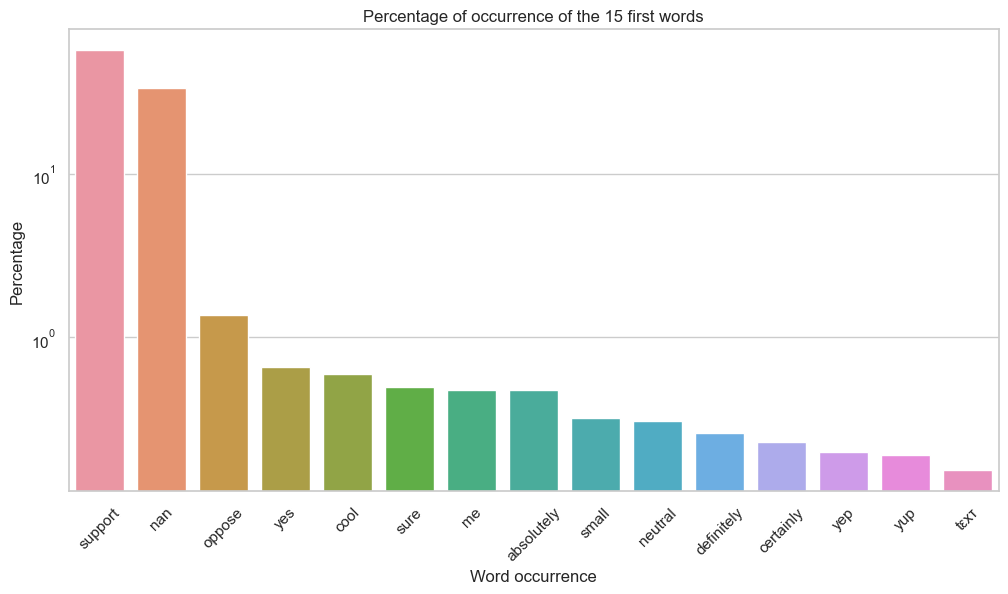

In [276]:
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage[:15].index, y=percentage[:15].values)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Word occurrence')
plt.ylabel('Percentage')
plt.title('Percentage of occurrence of the 15 first words')
plt.show()
                           

Nan values represent 33% of the 1 word comment we have, we need to replace these nan values with empty comment. 

## Distribution plot

In [5]:
sns.histplot(stat_df['Vector_Size'],binwidth=1, kde=False)  
plt.title('Comment length distribution')
plt.xlabel('Number of word per comment')
plt.ylabel('Number of comment')
plt.xlim(0,900)
plt.yscale('log') #pas sûre si ok de mettre log scale ici
plt.show()

NameError: name 'stat_df' is not defined

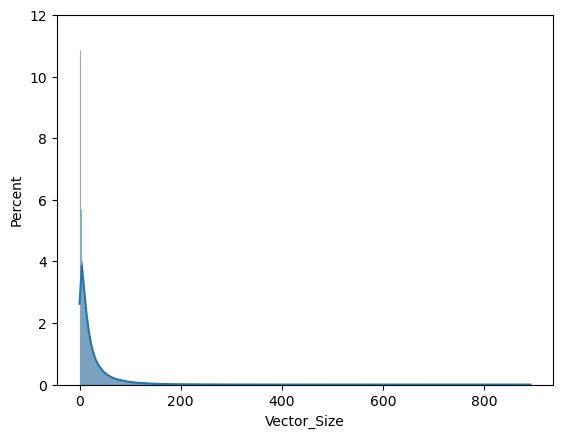

In [44]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=1, stat='percent') 
plt.ylim(0,12)
plt.show()

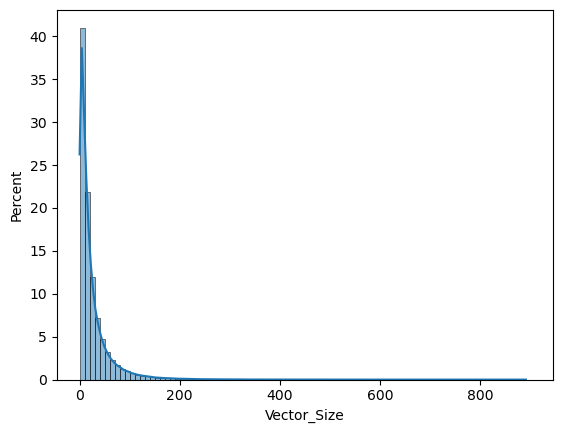

In [45]:
sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=10, stat='percent') #j'ai pris arbitrairement 10 mots
plt.show()

In [ ]:
"""EMMA VA REGARDER POUR AVOIR UN GRAPH QUI PERMETTE DE VOIR TOUTE LA DIST D'UN COUP """

#sns.histplot(data=stat_df, x='Vector_Size', kde=True, binwidth=1, stat='percent', log_scale=(True, False)) #j'ai pris 10 arbitrairement, à changer au besoin
fig, ax = plt.subplots(figsize=(15,10))
test = stat_df """ATTENTION, FAIRE UNE HARD COPY POUR PAS QUE CA MODIFIE LA DATAFRAME STAT_DF AUSSI"""
test.Vector_Size = test.Vector_Size+0.1
sns.histplot(data=test, kde=True, stat='percent', log_scale=(True, False), bins=100, ax=ax) #j'ai pris 10 arbitrairement, à changer au besoin
ax.set_title('Comment length distribution (percentage)')
ax.set_xlabel('Number of word per comment')
ax.set_ylabel('Percentage of comment')
ax.set_xscale('log')
ticks = [1, 10, 20, 50, 100, 200, 500, 1000]
#ax.set_xticks(ticks=ticks, labels=['1','10', '20', '50', '100', '200', '500', '1000'])
plt.show()